Testing nb for loading an image and then rotating it cv2.rotate() without losing pixels (aka creating black padding triangles and then shrinking that resultant shape back down to the proper size - would addiitionally keep the og img)

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import os, pathlib, glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import requests

In [6]:
pill_url = r'https://www.drugs.com/images/pills/mmx/t107206b/acetaminophen-and-hydrocodone-bitartrate.jpg'
affine_url = r'https://www.pyimagesearch.com/wp-content/uploads/2016/12/opencv_rotate_matrix.png'

In [7]:
#loop over urls and write valid urls to disk
try:
#     r = requests.get(pill_url, timeout=10)
    r = requests.get(affine_url, timeout=10)
    p = pathlib.Path.cwd()/f'affine_img.png'
    f = open(str(p), "wb")
    f.write(r.content)
    f.close()
    print(f'[INFO]: downloaded {p}')
except:
    print(f'[INFO]: error dowonloading {p} ... skipping')

[INFO]: downloaded C:\Users\Kris Johnson\Desktop\gitrepos\PyImgSrch\step_4\affine_img.png


---

![Affine Transforms](../assets/images/affine_img.png "lol")

The pyimagesearch explanation for the affine matrix is lacking

In [16]:
img_path = pathlib.Path.cwd()/'pill_img.png'

In [21]:
img = cv2.imread(str(img_path))

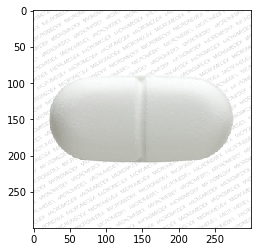

In [20]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

Let's say our img is 200x400, with origin (0,0) at the upper left and (199,-399) at the bottom right.

To rotate by 45 degrees, around the center (99,-199), can figure out how far each pixel moves easily using polar coordinates and then converting back to cartesian. 

So for pixel (x_0, y_0), calculate the distance from the centerpoint (99,199) and the angle. That point's new polar coordinate is (dist, angle + rotation). Converting to cartesian: `x=r*cos(theta); y=r*sin(theta)`, can easily see this using by drawing a triangle in the first quadrant.

Now the coords for each pixel need to be in the 4th quadrant, can do so by finding the smallest x_coord and largest y_coord, then adding and subtracting those values respectively on each pixel's coord's. 

Can now fill all null pixles between (0,0) and (x_max, y_min) with 0's for black.

In [22]:
img.shape

(300, 300, 3)

In [23]:
h, w = img.shape[:2]

In [26]:
center = (w // 2, h // 2)
angle = 45 #COUNTERCLOCKWISE!
scale = 1

In [27]:
M = cv2.getRotationMatrix2D(center, angle, scale)

In [29]:
type(M), M.shape

(numpy.ndarray, (2, 3))

In [30]:
M

array([[  0.70710678,   0.70710678, -62.13203436],
       [ -0.70710678,   0.70710678, 150.        ]])

In [31]:
rotate = cv2.warpAffine(img, M, (w,h))

In [33]:
type(rotate), rotate.shape

(numpy.ndarray, (300, 300, 3))

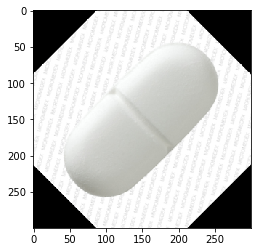

In [35]:
plt.imshow(cv2.cvtColor(rotate, cv2.COLOR_BGR2RGB))

with full black edges and __clockwise__

The previous solution uses a cv2 builtin fn which returns an affine transform matrix, then uses it. 

In [76]:
h, w = img.shape[:2]
h, w

(300, 300)

In [56]:
cX, cY = w/2, h/2 #need floats this time
cX, cY

(150.0, 150.0)

In [85]:
M = cv2.getRotationMatrix2D((cX, cY), -angle, scale*1.)
M

array([[  0.70710678,  -0.70710678, 150.        ],
       [  0.70710678,   0.70710678, -62.13203436]])

In [80]:
cos, sin = np.abs(M[0, 0]), np.abs(M[0, 1])
cos, sin

(0.7071067811865476, 0.7071067811865476)

In [73]:
#draw a rect turned by angle, then surround it with a rectangle, 
#and do basic geometry
nWidth = int((h * sin) + (w * cos))
nHeight = int((w * sin) + (h * cos))

In [86]:
#reset the center
M[0,2] += (nWidth/2) - cX
M[1,2] += (nHeight/2) - cY
M

array([[ 7.07106781e-01, -7.07106781e-01,  2.12000000e+02],
       [ 7.07106781e-01,  7.07106781e-01, -1.32034356e-01]])

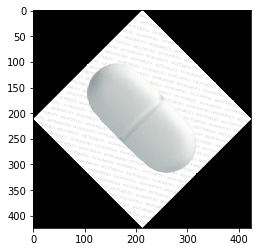

In [87]:
plt.imshow(cv2.warpAffine(img, M, (nWidth, nHeight)))

In [63]:
import imutils

In [66]:
dir(imutils)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'adjust_brightness_contrast',
 'auto_canny',
 'build_montages',
 'check_opencv_version',
 'convenience',
 'find_function',
 'grab_contours',
 'is_cv2',
 'is_cv3',
 'is_cv4',
 'meta',
 'opencv2matplotlib',
 'resize',
 'rotate',
 'rotate_bound',
 'skeletonize',
 'translate',
 'url_to_image']

In [69]:
z2 = imutils.rotate_bound(img, 45)

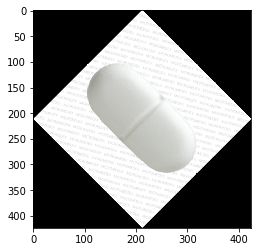

In [70]:
plt.imshow(cv2.cvtColor(z2, cv2.COLOR_BGR2RGB))